# Supervised Learning - Personal Loan Campaign Modelling

## Objective

The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Library Imports

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from uszipcode import SearchEngine
from IPython.core.display import HTML, display
from matplotlib import cm
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format
display(HTML("<style>.container { width:95% !important; }</style>"))

## Generic functions

In [94]:
def generate_histograms(df=None):
    columns = list(df.columns)
    nfig = len(columns)
    plt.style.use('seaborn-whitegrid')
    #
    nrows=(nfig//3) - 1
    nplot = ((nfig//3)+1) * 3
    ncols=3
    #
    f, ax = plt.subplots(nrows+2, ncols, figsize=(20, 20))
    #
    y_title_margin = 1.0
    #
    plt.subplots_adjust(
    left   = 0.125,
    right  = 0.9, 
    bottom = 0.1,
    top    = 0.9, 
    wspace = .25, 
    hspace = .45   
    )
    #
    counter = 0
    for cat in columns:
        value_counts = df[cat].value_counts()
        idx_x = counter // nrows
        idx_y = counter % ncols
#         print("idx_x = {}, idx_y = {}, counter = {}, cat = {}".format(idx_x, idx_y, counter,  cat))
        x_pos = np.arange(0, len(value_counts))
        _ = sns.distplot(df[cat], hist=True, ax=ax[idx_x, idx_y], color='dodgerblue')
        ax[idx_x, idx_y].set_title(cat, y = y_title_margin)
        ax[idx_x, idx_y].set_xlabel(cat, fontsize=15)
        ax[idx_x, idx_y].set_ylabel('Count', fontsize=15)
        for tick in ax[idx_x, idx_y].get_xticklabels():
            tick.set_rotation(90)
        counter += 1
    for n in range(nplot - nfig):
        f.delaxes(ax[(nfig//3),n+1])
    plt.show()

## Load the dataset

In [57]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

## Basic Information

In [58]:
df.shape

(5000, 14)

In [59]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [60]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [62]:
# Variable ID does not have any impact towards the target variable. hence dropping the column
df.drop('ID', axis=1, inplace=True)

In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00


In [64]:
## Move the Target Variable "Personal Loan" to the end 
tmp = df['Personal Loan']
df.drop('Personal Loan', axis=1, inplace=True)
df.columns
df['Personal Loan'] = tmp
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [65]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.60,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.50,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,1,0


## Types of variables

- Nominal (Categories - No ordering)
    - ZIP Code
- Ordinal (Ordered Categories)
    - Family
    - Education
- Interval
    - Age
    - Experience
    - Income
    - CCAvg
    - Mortgage
- Dichotomous or Binary
    - Personal Loan
    - Securities Account
    - CD Account
    - Online
    - CreditCard

In [66]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Attribute Information
| Column | Description |
| :--- | :--- |
| ID | Customer ID | 
| Age | Customer's age in completed years | 
| Experience | #years of professional experience | 
| Income | Annual income of the customer (\\$000) | 
| ZIP Code | Home Address ZIP code. | 
| Family | Family size of the customer | 
| CCAvg | Avg. spending on credit cards per month (\\$000) | 
| Education | Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional | 
| Mortgage | Value of house mortgage if any. ($000) | 
| Personal Loan | Did this customer accept the personal loan offered in the last campaign? | 
| Securities Account | Does the customer have a securities account with the bank? | 
| CD Account | Does the customer have a certificate of deposit (CD) account with the bank? | 
| Online | Does the customer use internet banking facilities? |
| CreditCard | Does the customer use a credit card issued byUniversalBank? |

## Check if there are null values

In [67]:
df.isnull().values.any()

False

## Observation:

- There are no null values

In [68]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

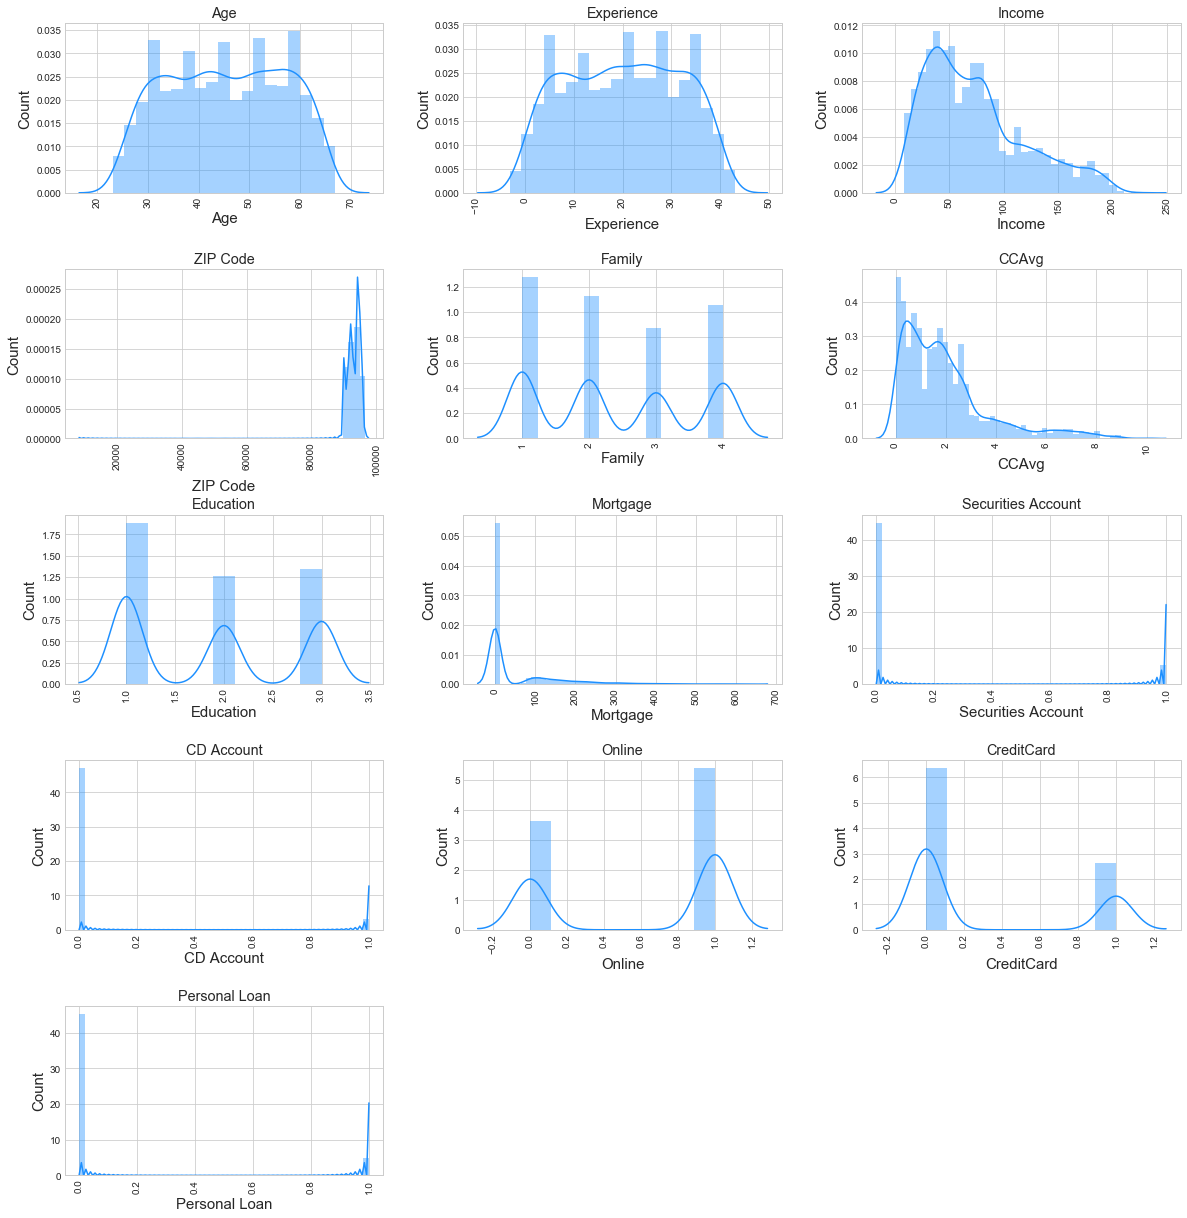

In [95]:
generate_histograms(df)

## Observation

- Age is evenly distributed and hence the median and mean are almost the same
- CCAvg is positively skewed where mean is greater than the median
- Experience seems to be evenly distributed since the Mean and the Median are almost the same but has negative values as shown in the graph above as well as the min value shown by the describe statement. 
- Income is positively skewed as well with mean greater than the median


## Fix the negative values in the Experience column

In [96]:
# Check the number of negative values in the experience column

df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [97]:
# Find the Age where these negative experience are found

df[df['Experience']<0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [98]:
list_age = df[df['Experience']<0]['Age'].unique().tolist()
list_age

[25, 24, 28, 23, 29, 26]

In [99]:
# Replace the negative experience with the mean of each age group
list_indexes = df[df['Experience'] <0].index.tolist()

In [100]:
for i in list_indexes:
    for j in list_age:
        df.loc[i, 'Experience'] = df[(df.Age == j) & (df.Experience > 0)].Experience.mean()

In [101]:
df[df['Experience']<0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [102]:
# Lets do a pairplot only for the interval variables

interval_df = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']]
interval_df.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.00,0.99,-0.06,-0.05,-0.01,-0.01
Experience,0.99,1.00,-0.05,-0.05,-0.01,-0.01
Income,-0.06,-0.05,1.00,0.65,0.21,0.50
CCAvg,-0.05,-0.05,0.65,1.00,0.11,0.37
Mortgage,-0.01,-0.01,0.21,0.11,1.00,0.14
Personal Loan,-0.01,-0.01,0.50,0.37,0.14,1.00


## From the above listing, we can see that there is:
- Strong correlation between Age and Experience
- Moderate correlation between CCAvg and Income
- With regards to the target variable "Personal Loan", only the Income and CCAvg has some correlation

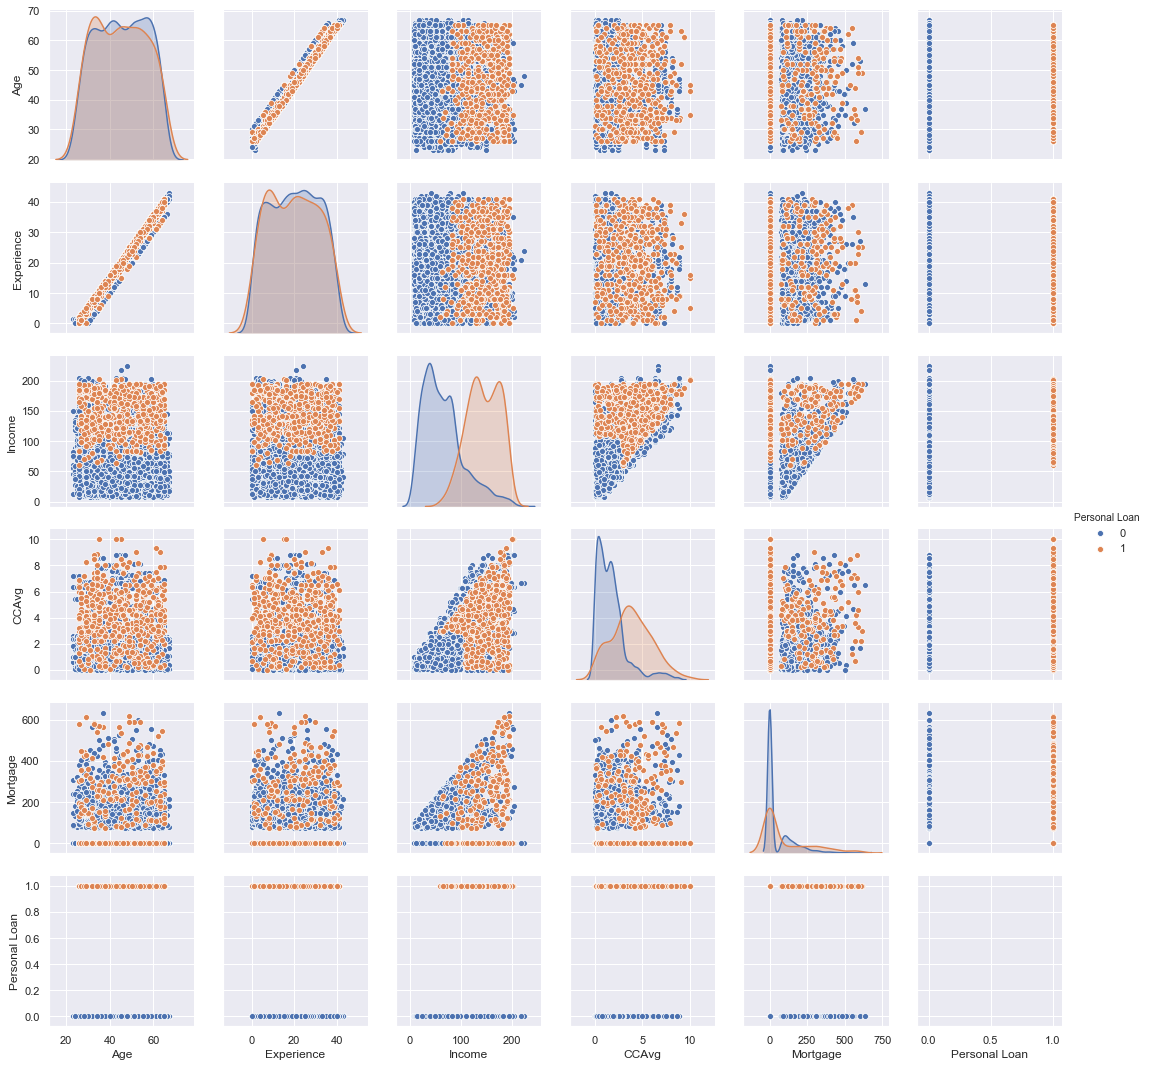

In [104]:
sns.set(color_codes=True)
_ = sns.pairplot(interval_df, diag_kind="kde", hue='Personal Loan')

In [105]:
# Create a Copy of the dataframe for mapping
df_copy = df.copy()
search = SearchEngine(simple_zipcode=True)
df_copy['lat'] = df_copy['ZIP Code'].apply(lambda x: search.by_zipcode(x).lat)
df_copy['lon'] = df_copy['ZIP Code'].apply(lambda x: search.by_zipcode(x).lng)
df_copy['median_income'] = df_copy['ZIP Code'].apply(lambda x: search.by_zipcode(x).median_household_income)

In [106]:
# Display the map

from keplergl import KeplerGl

# df_map = KeplerGl(height=800, data = {'data': df_copy[df_copy['Personal Loan']==1]})
df_map = KeplerGl(height=800, data = {'data': df_copy})
df_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data':       Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      2…

- Looking at the above map display, looks like the dataset is collected around main cities in the state of California

In [107]:
df_map = KeplerGl(height=800, data = {'data': df_copy[df_copy['Personal Loan']==1]})
df_map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'data':       Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
9      3…

- Looking at the above map the loan taken so afar are also in cities

## Target Variable Distribution

In [108]:
n_true = len(df.loc[df['Personal Loan'] == True])
n_false = len(df.loc[df['Personal Loan'] == False])
print("Number of true cases: {}({})".format(n_true, n_true/(n_true+n_false)*100))
print("Number of false cases: {}({})".format(n_false, n_false/(n_true+n_false)*100))

Number of true cases: 480(9.6)
Number of false cases: 4520(90.4)


**The percentage of users who have taken a Personal Loan or have accepted a Personal Loan is very low in the dataset and hence this is an imbalanced data**

## Split the data into training and test dataset

Split the data into 70% of data from training and 30% for testing

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal Loan', axis=1) 
y = df['Personal Loan']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

X_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4522,31,5.00,29,90630,1,0.30,1,0,0,0,0,0
2851,61,36.00,81,95449,3,1.80,2,0,0,0,1,0
2313,58,32.00,54,94035,3,0.30,2,0,0,0,1,1
982,58,33.00,52,94402,3,0.50,2,0,0,0,0,1
1164,41,17.00,94,90071,3,3.80,2,327,1,1,1,0


In [110]:
# Verify the split of data
print("Percentage of data in training dataset: {0:0.2f}%".format((len(X_train)/len(df.index))*100))
print("Percentage of data in testing dataset: {0:0.2f}%".format((len(X_test)/len(df.index))*100))

Percentage of data in training dataset: 60.00%
Percentage of data in testing dataset: 40.00%


## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
# Fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0     1    2     3    4    5    6    7    8    9    10   11  intercept
0 -0.00 -0.01 0.04 -0.00 0.01 0.01 0.02 0.00 0.00 0.00 -0.00 0.00      -0.00


In [112]:
# Score the model
model_score = model.score(X_test, y_test)
print("Model Score: {}".format(model_score))

Model Score: 0.9115


## Note

- The above score shows that the model is 90.7% accurate
- Since this is an imbalanced dataset, the accuracy reflects the distribution of the underlying class
- So lets look at the performance metrics to measure the accuracy of the model

## Confusion Matrix

In [113]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict, labels=[1,0])
print(cm)

[[  59  134]
 [  43 1764]]


In [114]:
def PlotConfusionMatrix(y_test,pred):
    cfn_matrix = confusion_matrix(y_test,pred)
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    # plt.title('Covariance matrix showing correlation coefficients', size = 18)
    plt.show() # ta-da!
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

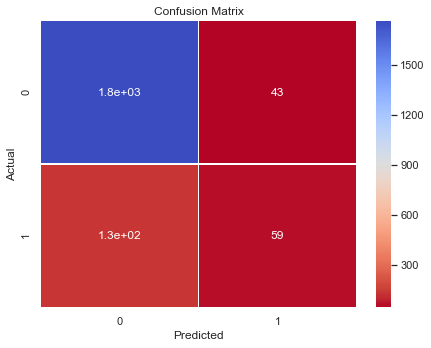

---Classification Report---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1807
           1       0.58      0.31      0.40       193

    accuracy                           0.91      2000
   macro avg       0.75      0.64      0.68      2000
weighted avg       0.90      0.91      0.90      2000



In [115]:
PlotConfusionMatrix(y_test, y_predict)

## Observation

- From the above listing, we see that the recall for class 1 is very less when compaed to class 0 and hence this model is not the best
- Reference: [Measures for imbalanced Training data](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

## Plot the Precision-Recall Curve 

To check if the model is doing well in its classification process, Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [116]:
def Plot_PR_ROC_Curve(model=None, title=None):
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.05,1.05])
    ax2.set_ylim([-0.05,1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')


    pred_prob = model.predict_proba(X_test)[:,1]
    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)
    
    ax1.plot(r,p,c='blue',label='Logistic')
    ax2.plot(tpr,fpr,c='blue',label='Logistic')
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')
    if title:
        fig.suptitle(title, fontsize=16)
    plt.show()

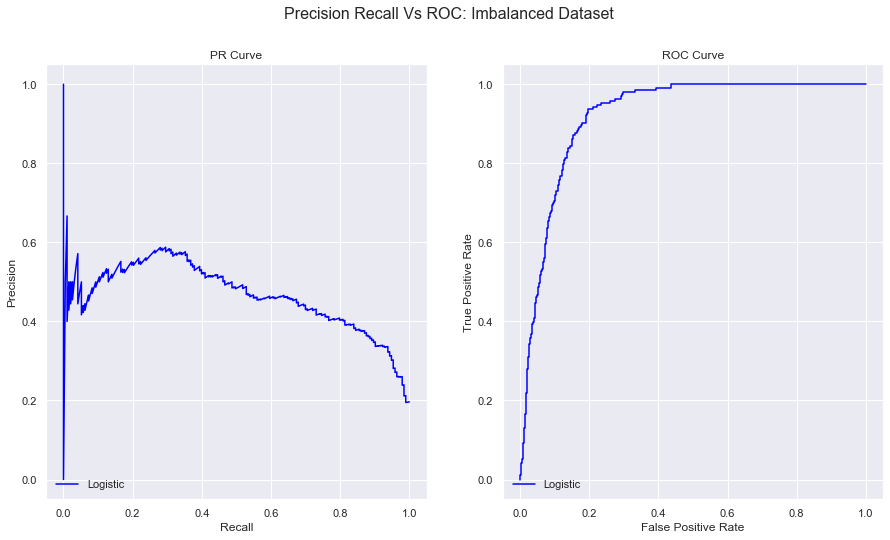

In [117]:
Plot_PR_ROC_Curve(model=model, title="Precision Recall Vs ROC: Imbalanced Dataset ")

## Observation

The above curve shows that model is just above the threshold line and does an average job of classification

## How can the model perform better

To make the model perform better, we need to handle the imbalance in the dataset. 

#### Use Weight to counter imbalance

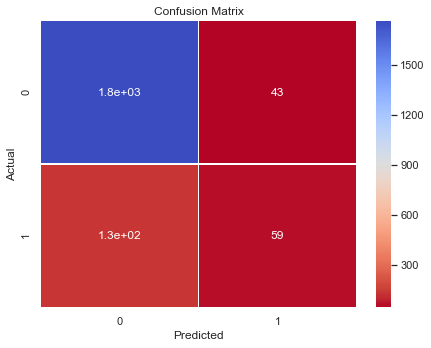

---Classification Report---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1807
           1       0.58      0.31      0.40       193

    accuracy                           0.91      2000
   macro avg       0.75      0.64      0.68      2000
weighted avg       0.90      0.91      0.90      2000



In [118]:
lr_weighted_model = LogisticRegression(class_weight='balanced')
lr_weighted_model.fit(X_train,y_train)

pred = lr_weighted_model.predict(X_test)

PlotConfusionMatrix(y_test,y_predict)

#### Observation
There seems to be no impact on the balanced parameter passed to LogisticRegression

#### Oversampling: SMOTE Algorithm

In [119]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 287
Before OverSampling, counts of label '0': 2713 



In [120]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (5426, 12)
After OverSampling, the shape of train_y: (5426,) 

After OverSampling, counts of label '1': 2713
After OverSampling, counts of label '0': 2713


Ref: [How to handle imbalanced data](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)

In [121]:
# Lets fit the model with the new sample

lr_after_oversampling = LogisticRegression() 
lr_after_oversampling.fit(X_train_res, y_train_res.ravel()) 
predictions = lr_after_oversampling.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1807
           1       0.38      0.87      0.53       193

    accuracy                           0.85      2000
   macro avg       0.68      0.86      0.72      2000
weighted avg       0.93      0.85      0.87      2000



#### Plot the curves

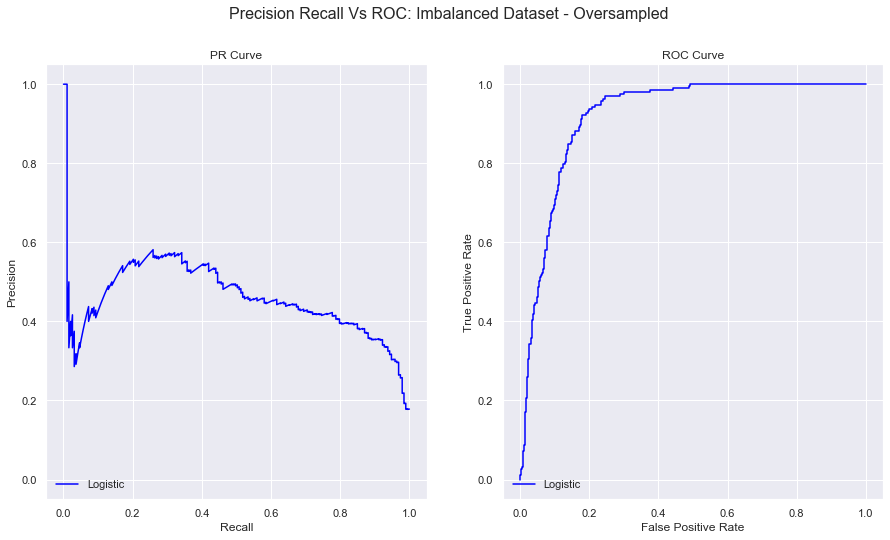

In [122]:
Plot_PR_ROC_Curve(model=lr_after_oversampling, title="Precision Recall Vs ROC: Imbalanced Dataset - Oversampled ")

#### Observation

The oversampling has tried to fix the imbalanced data issue. The change has reduced the accuracty to 84% from 91% but has improved the recall of the class 1 to 84%.

#### Undersampling: NearMiss Algorithm

In [123]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 287
Before Undersampling, counts of label '0': 2713 

After Undersampling, the shape of train_X: (574, 12)
After Undersampling, the shape of train_y: (574,) 

After Undersampling, counts of label '1': 287
After Undersampling, counts of label '0': 287


In [124]:
# train the model on train set 
lr_after_undersampling = LogisticRegression() 
lr_after_undersampling.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr_after_undersampling.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78      1807
           1       0.20      0.83      0.32       193

    accuracy                           0.66      2000
   macro avg       0.59      0.74      0.55      2000
weighted avg       0.90      0.66      0.73      2000



#### Plot the curves

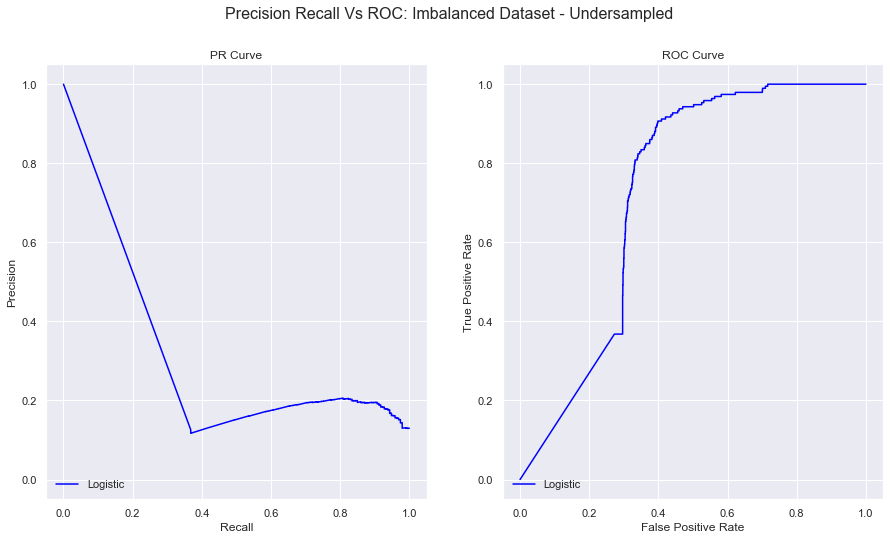

In [125]:
Plot_PR_ROC_Curve(model=lr_after_undersampling, title="Precision Recall Vs ROC: Imbalanced Dataset - Undersampled ")

#### Observation

The undersamping has reduced the accuracy as well as the recall. So the model with oversampling seems to be better. 